In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv("/content/drive/MyDrive/Advanced Machine Learning/data - data.csv")

In [4]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,02-05-2014 0:00,313000.0,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,02-05-2014 0:00,2384000.0,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,02-05-2014 0:00,342000.0,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,02-05-2014 0:00,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,02-05-2014 0:00,550000.0,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   int64  
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [6]:
data.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [7]:
data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,02-05-2014 0:00,3.130000e+05,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,02-05-2014 0:00,2.384000e+06,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,02-05-2014 0:00,3.420000e+05,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,02-05-2014 0:00,4.200000e+05,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,02-05-2014 0:00,5.500000e+05,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,09-07-2014 0:00,3.081667e+05,3,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,09-07-2014 0:00,5.343333e+05,3,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,09-07-2014 0:00,4.169042e+05,3,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,10-07-2014 0:00,2.034000e+05,4,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [8]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [10]:
data.shape

(4600, 18)

In [11]:
data.drop(['date'], axis = 1, inplace = True)
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,313000.0,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2384000.0,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,342000.0,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,550000.0,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [12]:
data.country.value_counts()

USA    4600
Name: country, dtype: int64

In [13]:
#since all the countries are USA only
data.drop(['country'], axis = 1, inplace = True)
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip
0,313000.0,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133
1,2384000.0,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119
2,342000.0,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042
3,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008
4,550000.0,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052


In [14]:
data.drop(['street', 'city'], axis = 1, inplace = True)
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,statezip
0,313000.0,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,WA 98133
1,2384000.0,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,WA 98119
2,342000.0,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,WA 98042
3,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,WA 98008
4,550000.0,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,WA 98052


In [15]:
data.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
statezip         0
dtype: int64

<ipython-input-16-0b5eade717fc>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = data.corr()


<Axes: >

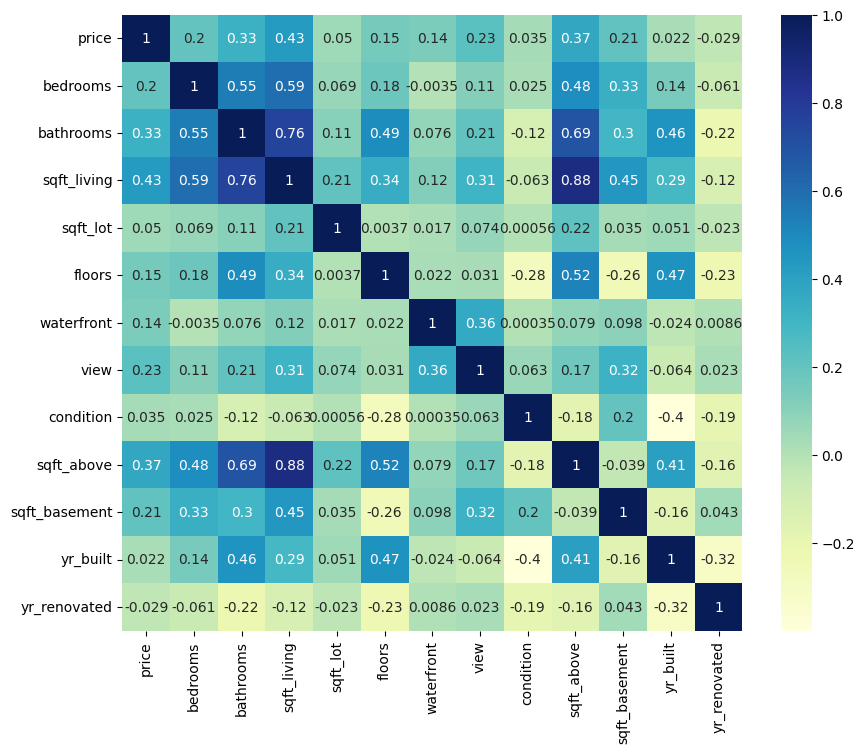

In [16]:
a4_dims = (10, 8)
fig, ax = plt.subplots(figsize=a4_dims)
cor = data.corr()
sns.heatmap(cor, annot = True, cmap="YlGnBu")

<Axes: xlabel='bedrooms', ylabel='price'>

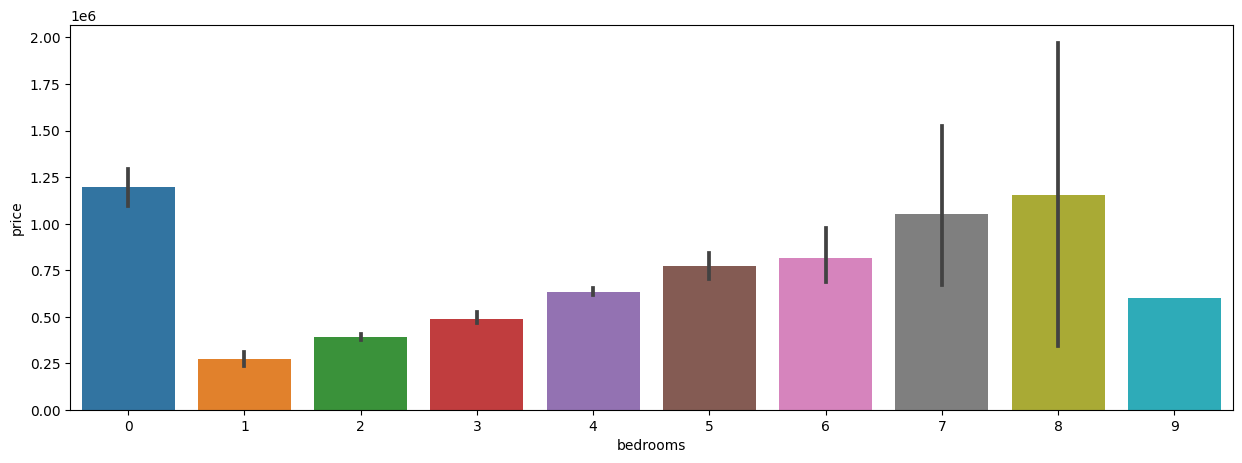

In [17]:
a4_dims = (15, 5)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(x = data.bedrooms, y = data.price)

In [18]:
data.groupby('bedrooms').price.agg([len, min, max])

,len,min,max
bedrooms,,,
0,2,1095000.0,1295648.0
1,38,0.0,540000.0
2,566,0.0,1695000.0
3,2032,0.0,26590000.0
4,1531,0.0,4489000.0
5,353,0.0,7062500.0
6,61,0.0,3100000.0
7,14,280000.0,3200000.0
8,2,340000.0,1970000.0


<Axes: xlabel='price', ylabel='statezip'>

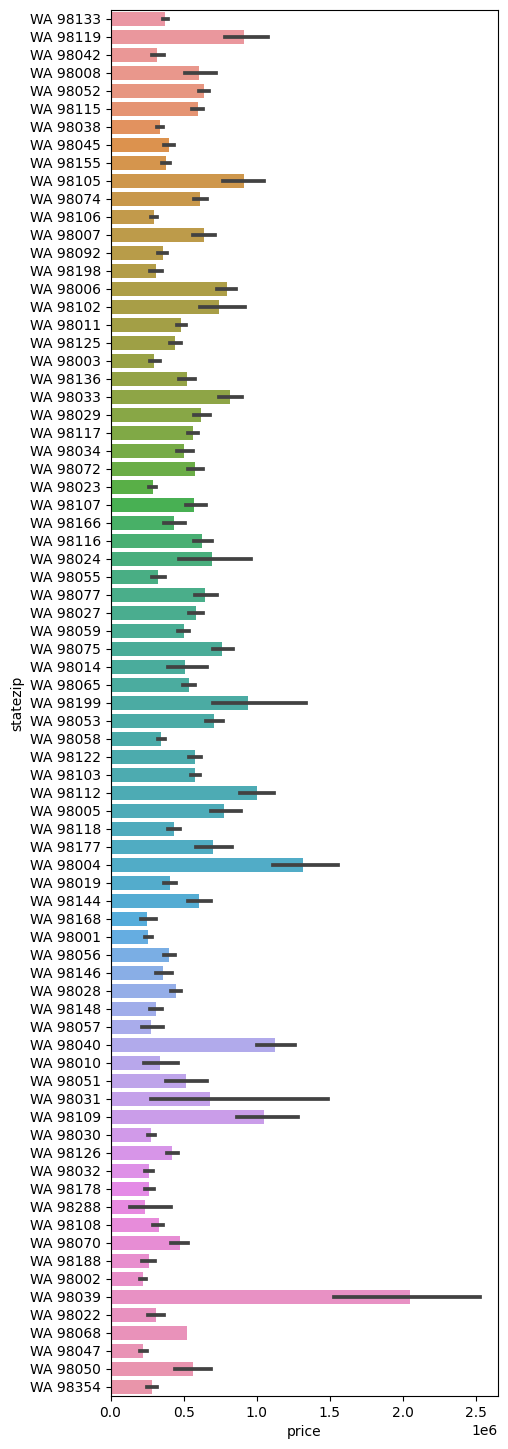

In [19]:
a4_dims = (5, 18)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(ax = ax, x = data.price, y = data.statezip)

<ipython-input-20-e2d96d712e01>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a = data.price, bins = 1000, color = 'r', ax = ax)


<Axes: xlabel='price', ylabel='Density'>

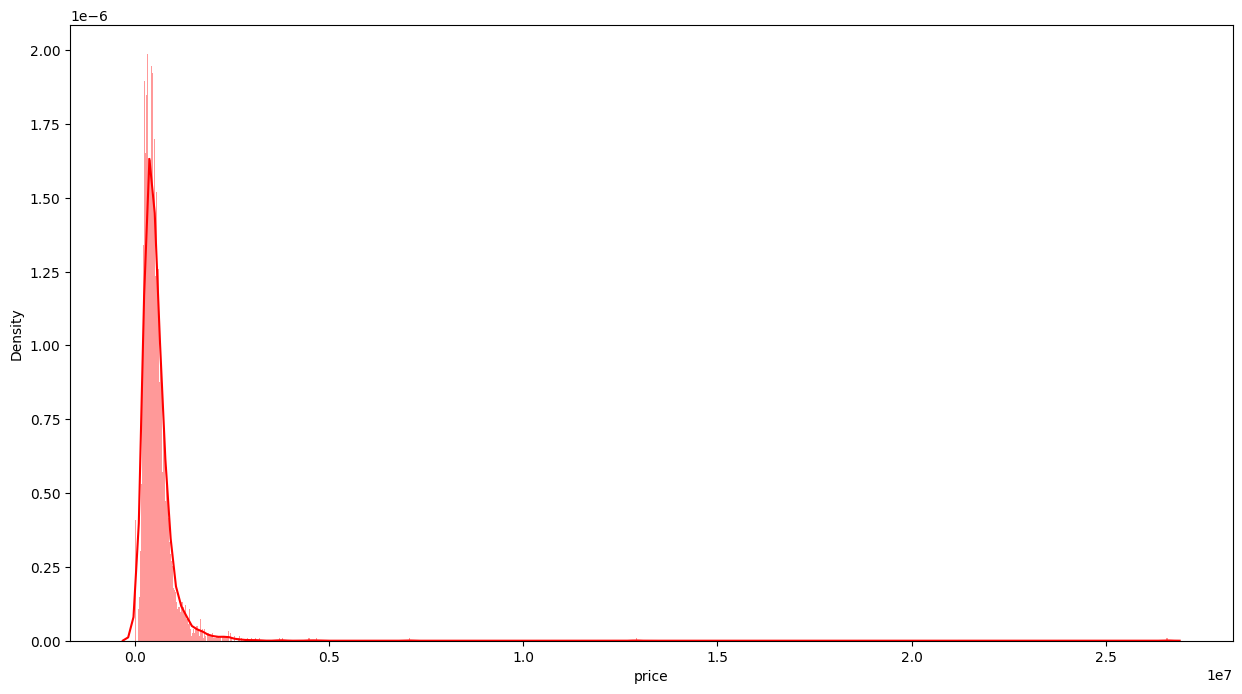

In [20]:
a4_dims = (15, 8)
fig, ax = plt.subplots(figsize=a4_dims)
sns.distplot(a = data.price, bins = 1000, color = 'r', ax = ax)

<Axes: xlabel='bathrooms', ylabel='price'>

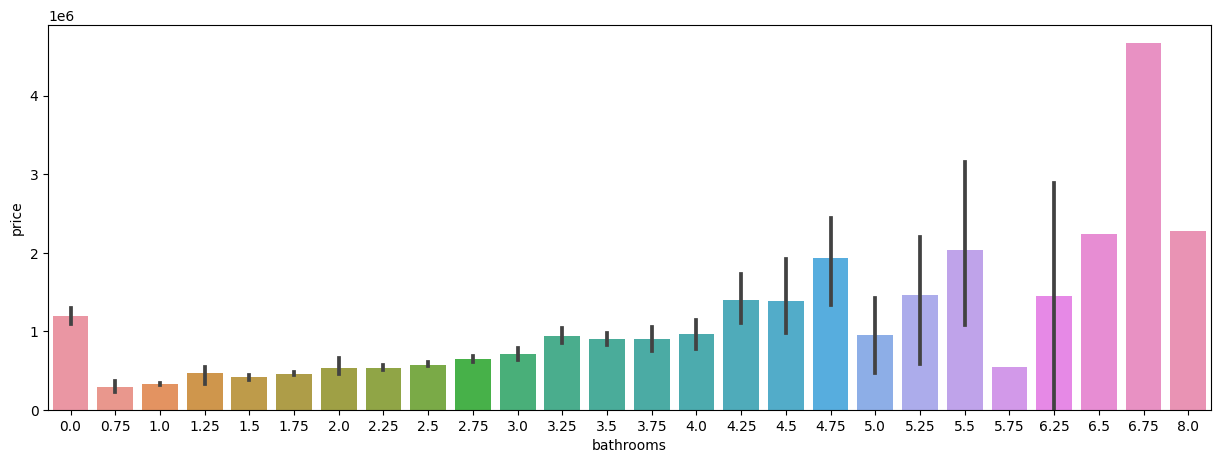

In [21]:
a4_dims = (15, 5)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(x = data.bathrooms, y = data.price)

<ipython-input-23-d99e5c7a8883>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[(data.price == 0)].sqft_living)


<Axes: xlabel='sqft_living', ylabel='Density'>

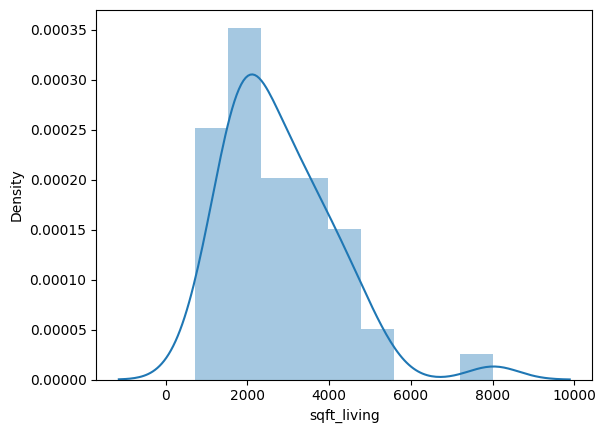

In [23]:
sns.distplot(data[(data.price == 0)].sqft_living)

In [24]:
data[(data.price == 0)].agg([min, max, 'mean', 'median'])

<ipython-input-24-c803b2c0fcaf>:1: FutureWarning: ['statezip'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  data[(data.price == 0)].agg([min, max, 'mean', 'median'])


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,statezip
min,0.0,1.000000,1.00000,720.000000,3500.000000,1.0,0.000000,0.000000,2.000000,720.000000,0.000000,1920.000000,0.000000,WA 98001
max,0.0,6.000000,6.25000,8020.000000,188200.000000,3.0,1.000000,4.000000,5.000000,8020.000000,1950.000000,2013.000000,2009.000000,WA 98199
mean,0.0,3.979592,2.69898,2787.142857,16453.306122,1.5,0.061224,0.795918,3.673469,2295.714286,491.428571,1969.918367,812.714286,NaN
median,0.0,4.000000,2.50000,2600.000000,9000.000000,1.5,0.000000,0.000000,3.000000,1990.000000,0.000000,1962.000000,0.000000,NaN


In [28]:
print(data['yr_built'].unique())

[1955 1921 1966 1963 1976 1938 1989 1985 1945 1948 1909 1980 1939 1965
 1956 1997 1987 1983 1923 1954 2005 1991 1959 1920 1979 1951 1967 2004
 2014 1995 1944 1992 1957 1978 1974 1950 1990 1949 1968 1977 1996 2001
 2000 1929 2006 2008 2009 2012 2013 2007 1986 1973 1988 1900 1928 1982
 1960 2003 1998 1942 1908 1958 1971 1975 1961 1924 1902 1962 1953 1999
 1994 1930 1984 2010 1912 1947 1916 1940 1970 1952 1964 1926 1905 1969
 1903 1943 1993 1946 1910 1904 1981 1906 1922 2011 2002 1917 1913 1914
 1937 1925 1932 1918 1972 1941 1919 1936 1911 1927 1931 1901 1907 1915
 1935 1933 1934]


In [26]:
print(data['sqft_above'].unique())

[1340 3370 1930 1000 1140  880 1350 2710 1570 1520 1710 1910 1970 1090
 2910 1200 3110 1370 1180 1550 1450 1470 2730 1130 1360 1300 2820 1700
 1560 2190 1640 2300 3240  800 1650 1440 1580 1480  850 1770 1210 1160
 1270 3310 1880 1800 1460 1070 3660 1040 1280 2680 2540 2920  900 1010
 2010 1990 1900 1330 1110 1610 1620 2490 3690 1320 2110 3180 1400 2780
 1810  780 1680 1750 1410 2850 2370 1540 4340  840 1240 1050 2310 1120
 2230  810 1690 1670 9410 1430 2220 1960 1080 1790 2440 1940 3400 3410
 1571 1408 3040 3200 1590 2450 1100  860 2150 2000 1030  720 2020  980
 1260 3470 2290 1850 2460 1020 2331 2400  960 3740 1420 1170 2280 1630
 3030 1310 3880 1230 2740 3380  930 1060 4510  740 2690 3569 3930  990
 2430 4460 1250 1600 1220 1780 1720 1760 1830 1870 4760 2720 1920  820
 1860 2245 3170 1890 2030 2130  760 3560  910 3700 2180 1380 1500 1660
 1490 3900 1150 2656 1606 2090 2550 2660 1290 2320 2250 1390  650 3290
 1980 3510 1510  790 1190 1840 2015 4230 2560 2790 3750 2600 2260 2470
 3000 

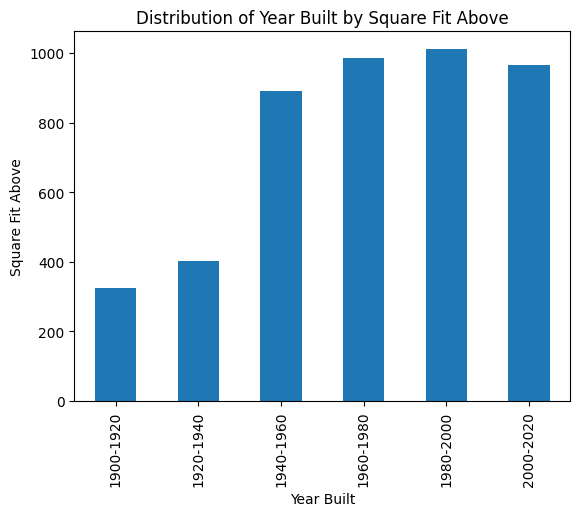

In [29]:
data['year_built'] = pd.cut(data['yr_built'], bins=[1900, 1920, 1940, 1960, 1980, 2000, 2020], labels=['1900-1920', '1920-1940', '1940-1960', '1960-1980', '1980-2000', '2000-2020'])
# group the data by age group and calculate the count
year_built_counts = data.groupby('year_built')['sqft_above'].count()
# create a bar chart
year_built_counts.plot(kind='bar')
# add labels and title
plt.xlabel('Year Built')
plt.ylabel('Square Fit Above')
plt.title('Distribution of Year Built by Square Fit Above')
# display the chart
plt.show()